In [1]:
import pandas as pd
import nfl_data_py as nfl

# Initialize an empty DataFrame to store all the pbp data
all_years_pbp_data = pd.DataFrame()

In [2]:
for year in range(1999, 2024): 
    # Correctly pass the year as a list to comply with the function's requirements
    year_pbp_data = nfl.import_pbp_data([year])
    
    # Append the data for the current year to the cumulative DataFrame
    all_years_pbp_data = pd.concat([all_years_pbp_data, year_pbp_data], ignore_index=True)


# Display the first 5 rows
print(all_years_pbp_data.head())
# Get descriptive statistics for numeric columns
print(all_years_pbp_data.shape)

1999 done.
Downcasting floats.
2000 done.
Downcasting floats.
2001 done.
Downcasting floats.
2002 done.
Downcasting floats.
2003 done.
Downcasting floats.
2004 done.
Downcasting floats.
2005 done.
Downcasting floats.
2006 done.
Downcasting floats.
2007 done.
Downcasting floats.
2008 done.
Downcasting floats.
2009 done.
Downcasting floats.
2010 done.
Downcasting floats.
2011 done.
Downcasting floats.
2012 done.
Downcasting floats.
2013 done.
Downcasting floats.
2014 done.
Downcasting floats.
2015 done.
Downcasting floats.
2016 done.
Downcasting floats.
2017 done.
Downcasting floats.
2018 done.
Downcasting floats.
2019 done.
Downcasting floats.
2020 done.
Downcasting floats.
2021 done.
Downcasting floats.
2022 done.
Downcasting floats.
2023 done.
Downcasting floats.
   play_id          game_id old_game_id home_team away_team season_type  week  \
0     35.0  1999_01_ARI_PHI  1999091200       PHI       ARI         REG     1   
1     60.0  1999_01_ARI_PHI  1999091200       PHI       ARI    

In [3]:
pbp_rp = all_years_pbp_data[(all_years_pbp_data['pass'] == 1) | (all_years_pbp_data['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset=['epa', 'posteam', 'defteam'])
pbp_rp.shape

(875154, 390)

In [4]:
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values('pass_epa', ascending = False)

,posteam,pass_epa
11,GB,0.149463
21,NE,0.137530
13,IND,0.124651
17,LAC,0.115624
22,NO,0.114964
15,KC,0.113199
26,PIT,0.087023
27,SEA,0.082564
8,DAL,0.073673
1,ATL,0.059827


In [5]:
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,ARI,-0.024139,-0.129502
1,ATL,0.059827,-0.097480
2,BAL,0.019093,-0.066728
3,BUF,0.018981,-0.085943
4,CAR,-0.004375,-0.081639


In [6]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [8]:
import os
import urllib.request
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')

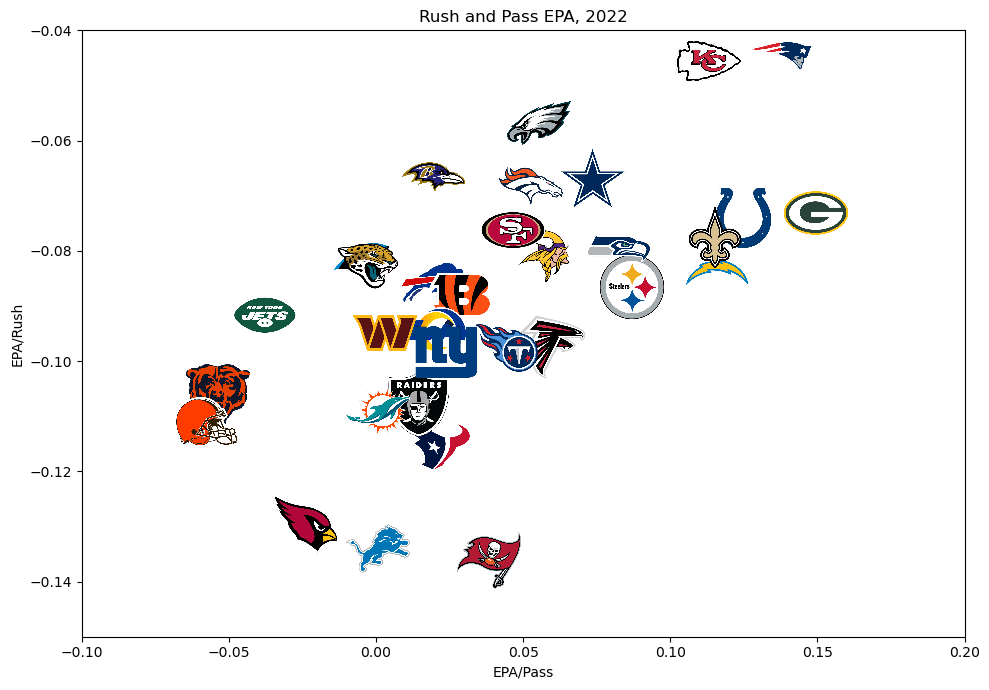

In [12]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.xlim(-0.1, 0.2)
plt.ylim(-0.15, -0.04)
plt.title("Rush and Pass EPA, 2022")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")
plt.show()

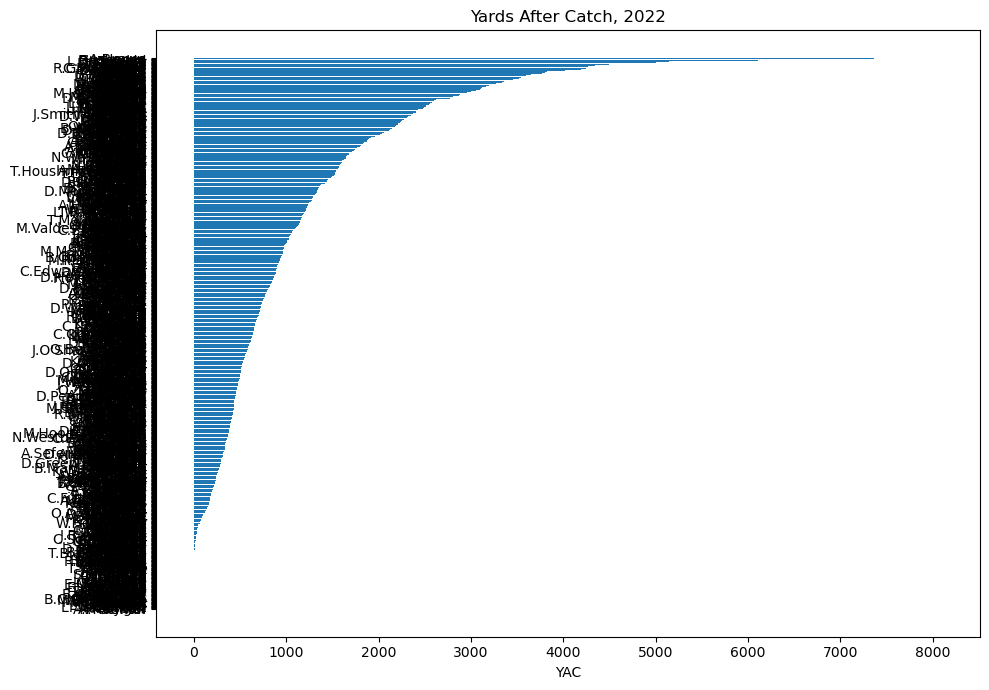

In [13]:
receiver_yac = pbp_rp[(pbp_rp['pass'] == 1)].groupby('receiver_player_name').agg({'pass': 'count', 'yards_after_catch': 'sum'}).reset_index().rename(columns = {'pass' : 'targets', 'yards_after_catch' : 'yac'})
receiver_yac = receiver_yac[(receiver_yac['targets'] >= 100)]
receiver_yac.sort_values('yac', inplace = True)


name = receiver_yac['receiver_player_name']
yac = receiver_yac['yac']

fig, ax = plt.subplots(figsize=(10, 7))

ax.barh(name, yac)
ax.set_title("Yards After Catch, 2022")
ax.set_xlabel("YAC")
plt.show()